# Problem2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# Load xls file
data = pd.read_excel('/Users/jamesguan/Project/StatsLab/time_series_intro_class/data/HW_2_Data.xls', parse_dates=['Date'])

data.columns

Index(['Date', 'GLD _DailyClose'], dtype='object')

In [3]:
data.head()

,Date,GLD _DailyClose
0,2004-11-18,44.38
1,2004-11-19,44.78
2,2004-11-22,44.95
3,2004-11-23,44.75
4,2004-11-24,45.05


a) Plot the time series.

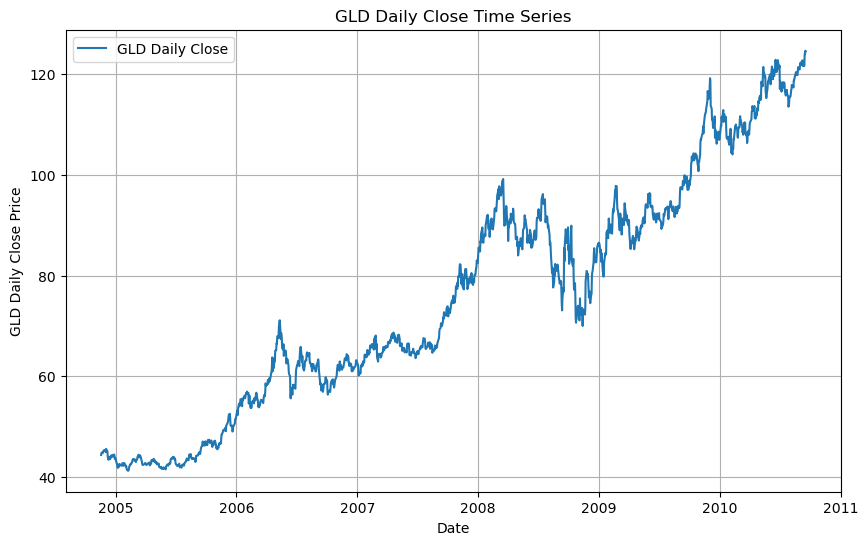

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['GLD _DailyClose'], label='GLD Daily Close')
plt.xlabel('Date')
plt.ylabel('GLD Daily Close Price')
plt.title('GLD Daily Close Time Series')
plt.legend()
plt.grid(True)
plt.show()

b) Obtain the equation for its linear trend, de-trend the original time series, and plot it.


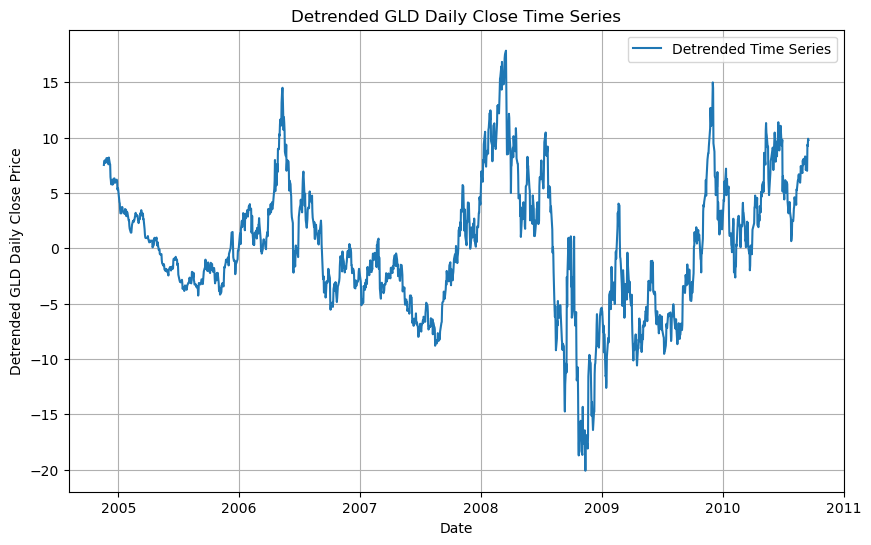

In [5]:
X = (data['Date'] - data['Date'].min()).dt.days.values.reshape(-1, 1)
Y = data['GLD _DailyClose'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), Y)
trend = slope * X.flatten() + intercept
detrended = Y - trend

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], detrended, label='Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Detrended GLD Daily Close Price')
plt.title('Detrended GLD Daily Close Time Series')
plt.legend()
plt.grid(True)
plt.show()


c) Plot the sample autocorrelation function for the de-trended time series. What process do
you recommend to model the de-trended time series?


<Figure size 1000x600 with 0 Axes>

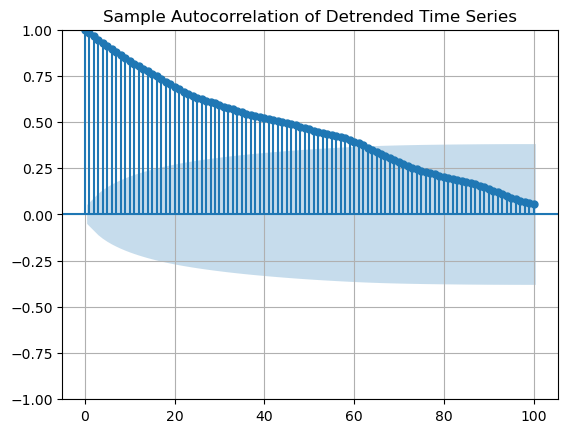

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(detrended, lags=100, title="Sample Autocorrelation of Detrended Time Series")
plt.grid(True)
plt.show()


Based on the autocorrelation function, I would recommend AR(p) model for the detrended time series since the sample autocorrelation function shows a significant autocorrelation across multiple lags and the autocorrelation is decaying geometrically.

To determine the order of the AR model, we can look at the partial autocorrelation function plot.

<Figure size 1000x600 with 0 Axes>

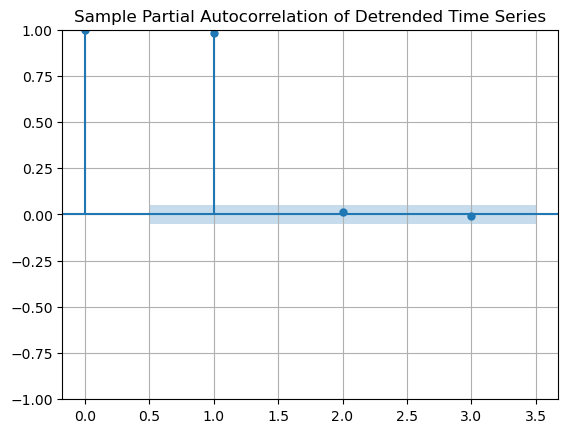

In [7]:
# Plot partial autocorrelation function for the detrended time series
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 6))
plot_pacf(detrended, lags=3, title="Sample Partial Autocorrelation of Detrended Time Series")
plt.grid(True)
plt.show()

Conclusion: I would recommend AR(1) model for the detrended time series since it cut off at lag 1. 

d) Calibrate the parameters for the de-trended time series.


In [8]:
# The AR(1) model calibration
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(detrended, lags=1)
AR1_model = model.fit()

AR1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1468
Model:                     AutoReg(1)   Log Likelihood               -2223.759
Method:               Conditional MLE   S.D. of innovations              1.102
Date:                Tue, 15 Oct 2024   AIC                           4453.518
Time:                        11:25:09   BIC                           4469.391
Sample:                             1   HQIC                          4459.438
                                 1468                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.029      0.049      0.961      -0.055       0.058
y.L1           0.9831      0.005    203.499      0.000       0.974       0.993
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# Parameters for AR(1) model
phi = AR1_model.params[1]
print(f'phi: {phi}')

phi: 0.9831112024609627


###  The model with the estimated parameter phi

$$ Y_t = 0.983 Y_{t-1} + \epsilon_t $$

where $$ Y_t = GLD_{t}$$

e) Plot the first difference of the original time series.


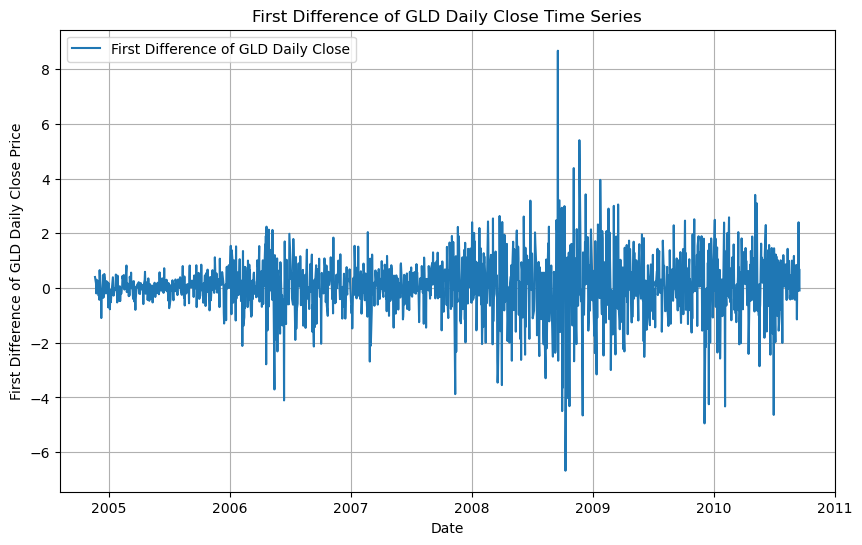

In [10]:
# First difference of the original time series
first_diff = np.diff(data['GLD _DailyClose'])

plt.figure(figsize=(10, 6))
plt.plot(data['Date'][1:], first_diff, label='First Difference of GLD Daily Close')
plt.xlabel('Date')
plt.ylabel('First Difference of GLD Daily Close Price')
plt.title('First Difference of GLD Daily Close Time Series')
plt.legend()
plt.grid(True)
plt.show()


f) Plot the sample autocorrelation function for the differenced time series. What process
model do you recommend for the differenced time series?


<Figure size 1000x600 with 0 Axes>

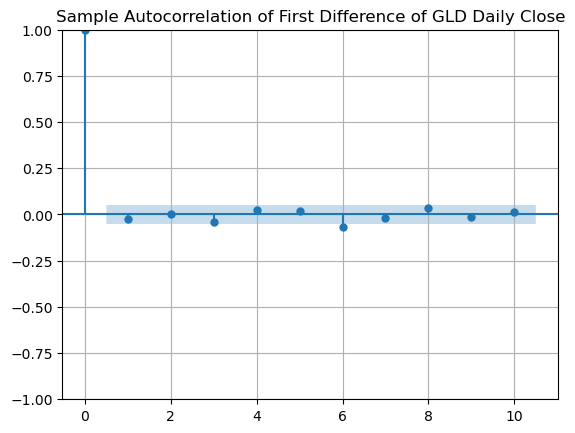

In [11]:
# Sample autocorrelation function for the differenced time series
plt.figure(figsize=(10, 6))
plot_acf(first_diff, lags=10, title="Sample Autocorrelation of First Difference of GLD Daily Close")
plt.grid(True)
plt.show()


Conclusion: The model seems to more act towards to white noise, i.e. MA(0). But to be conservatively, I would recommend MA(1) model for the differenced time series since the sample autocorrelation function shows a significant autocorrelation has no lag significant (or dying out quickly). I would guess with very small theta for MA(1) model as well. 

g) Calibrate the parameters for the differenced time series.

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model_ma1 = ARIMA(first_diff, order=(0, 0, 1))  # MA(1) model
ma1_model_fit = model_ma1.fit()

# Display the MA(1) model summary
print(ma1_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1467
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2228.284
Date:                Tue, 15 Oct 2024   AIC                           4462.568
Time:                        11:25:10   BIC                           4478.441
Sample:                             0   HQIC                          4468.488
                               - 1467                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.028      1.934      0.053      -0.001       0.110
ma.L1         -0.0242      0.021     -1.168      0.243      -0.065       0.016
sigma2         1.2214      0.023     52.486      0.0

In [13]:
# Parameters for MA(1) model
theta = ma1_model_fit.params[1]
print(f'theta: {theta}')

theta: -0.02421430037758039


### The model with the estimated parameter theta

$$ Y_t = \epsilon_t + -0.0242 \epsilon_{t-1} $$

where $$ Y_t = \Delta GLD_{t} $$
